## Регрессия и Boston Housing
Мы рассматриваем задачу восстановления регресси. 
Данные - сведения о жилье в районе Boston Mass/
Подробное описание датасета и признаков: http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)
%matplotlib inline 

data = pd.read_csv("data.csv")
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


## Seaborn

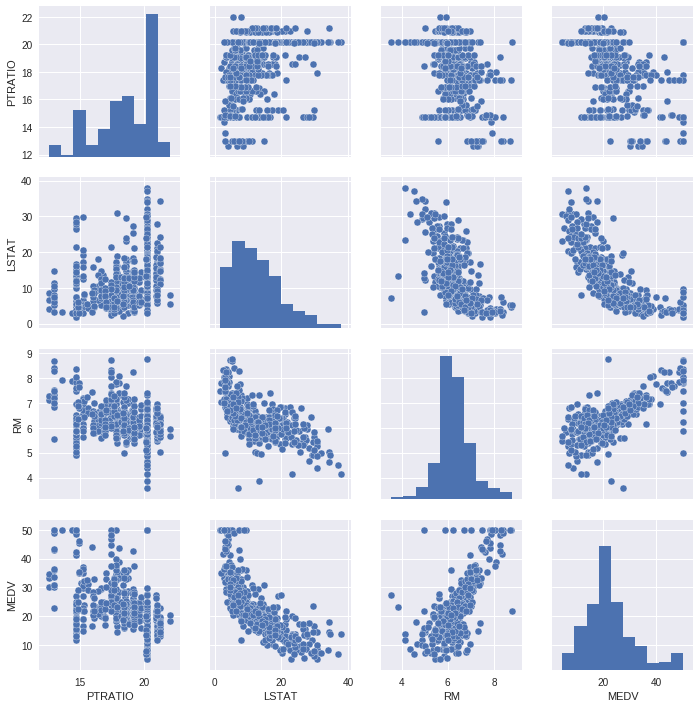

In [2]:
g = sns.pairplot(data[['PTRATIO','LSTAT', 'RM', 'MEDV']])


Рисуем линию регрессии-к-целевой переменной. Смотрим на корреляцию некоторых переменных. Рассказываем о важности изучить набор данных. 

PTRATIO - учитель/ученик рейтинг. Как мы видим - чем выше это соотношение тем, в среднем, дороже цена дома

LSTAT - процент представителей "рабочего класса" по соседству.

RM - количество комнат. Очевидно. 

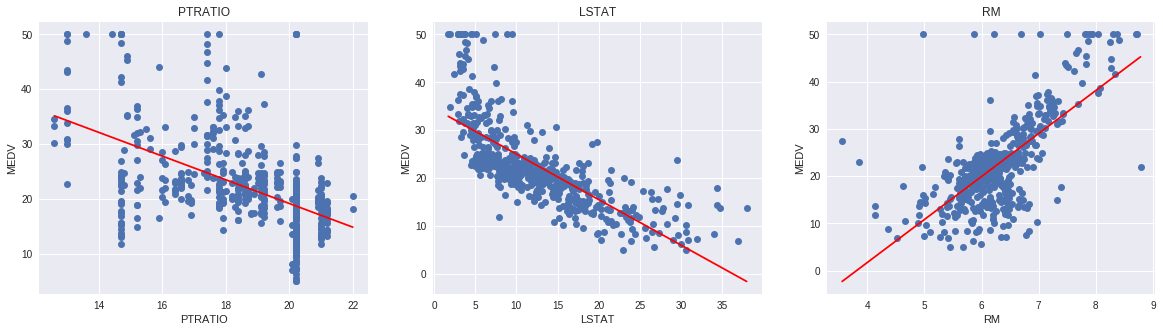

In [3]:

plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(['PTRATIO','LSTAT','RM']):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = data.MEDV
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color = 'r')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Строим baseline

In [4]:
from sklearn.model_selection import train_test_split

y = data['MEDV']
X = data.drop('MEDV', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=0)


In [5]:

from sklearn import cross_validation, grid_search, linear_model, metrics
regr = linear_model.SGDRegressor(random_state = 42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')


/home/eugene/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/eugene/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


MAE: 91108377992151.86


In [6]:
#Смотрим на общие значения целевой переменной - и понимаем, - не очень.

print(y_test[0:10].tolist())
print(list(map(lambda x: "{:2e}".format(x),y_pred[0:10])))
#regr.coef_

[22.6, 50.0, 23.0, 8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6]
['9.859121e+13', '8.928131e+13', '1.357744e+14', '8.947489e+13', '1.137957e+14', '1.255881e+14', '8.650310e+13', '1.343754e+14', '1.039865e+14', '2.158454e+13']


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
scaled_train_data = scaler.transform(X_train)
scaled_test_data = scaler.transform(X_test)

In [8]:

regr.fit(scaled_train_data, y_train)
y_scaled_pred = regr.predict(scaled_test_data)
print(f'MAE: {metrics.mean_absolute_error(y_test, y_scaled_pred):.2f}')


MAE: 3.55


In [9]:
print(y_test.values[:10])
print(y_scaled_pred[:10])
#print( y_pred[:10])


[ 22.6  50.   23.    8.3  21.2  19.9  20.6  18.7  16.1  18.6]
[ 25.79  21.22  28.37  10.42  20.93  19.12  18.43  20.59  17.11  19.89]


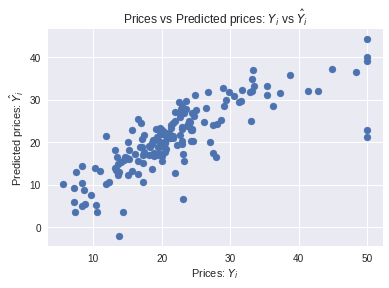

In [10]:
import matplotlib.pyplot as plt
y_pred = regr.predict(X_test)

plt.scatter(y_test, y_scaled_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [11]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regr)])
pipeline.fit(X_train, y_train)
print(f"MAE: {metrics.mean_absolute_error(y_test, pipeline.predict(X_test)):.2f}")

MAE: 3.55


In [12]:
pipeline.get_params().keys()

dict_keys(['steps', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__n_iter', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__verbose', 'regression__warm_start'])

In [13]:
parameters_grid = {
    'regression__loss' : ['huber', 'squared_loss', ],
    'regression__n_iter' : [ 5, 10, 20], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.001, 0,1],
}

grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 4)


In [14]:
%%time
grid_cv.fit(X_train, y_train)

CPU times: user 1.61 s, sys: 0 ns, total: 1.61 s
Wall time: 1.61 s


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(steps=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regression', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'regression__loss': ['huber', 'squared_loss'], 'regression__n_iter': [5, 10, 20], 'regression__penalty': ['l1', 'l2', 'none'], 'regression__alpha': [0.0001, 0.001, 0, 1]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_absolute_error', verbose=0)

MAE : 3.280
{'regression__alpha': 0.001, 'regression__loss': 'squared_loss', 'regression__n_iter': 5, 'regression__penalty': 'l2'}


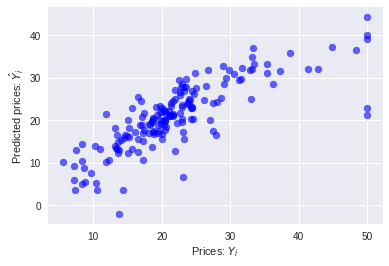

In [15]:
print(f"MAE : {-1 * grid_cv.best_score_ :.3f}")
print(grid_cv.best_params_ )
#print(grid_cv.best_estimator_.steps[1][1].coef_ )
plt.scatter(y_test, pipeline.predict(X_test), color = "b", alpha = 0.6)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")


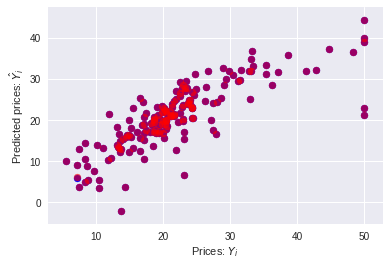

In [16]:
plt.scatter(y_test, pipeline.predict(X_test), color = "b")

plt.scatter(y_test, grid_cv.best_estimator_.predict(X_test), color = 'r', alpha = 0.6)

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")

plt.show()

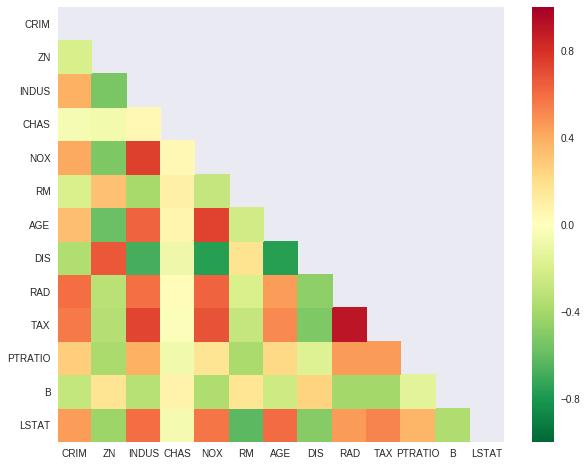

In [115]:

x_corr = X_train.corr(method = "pearson")
mask = np.zeros_like(x_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches

fig = sns.heatmap(x_corr, cmap='RdYlGn_r' ,mask = mask)

plt.show()

In [116]:
X_train_dropped = X_train.drop("AGE", axis = 1).drop("INDUS", axis=1)
X_test_dropped = X_test.drop("AGE", axis = 1).drop("INDUS", axis=1)
grid_cv_drpd = grid_cv
grid_cv_drpd.fit(X_train_dropped, y_train)

print(f"MAE {-1 * grid_cv_drpd.best_score_: .3f}")
print(grid_cv_drpd.best_params_)


MAE  3.264
{'regression__alpha': 0.001, 'regression__loss': 'squared_loss', 'regression__n_iter': 5, 'regression__penalty': 'l2'}


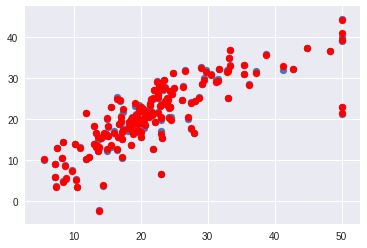

In [117]:

plt.scatter(y_test, pipeline.predict(X_test))

plt.scatter(y_test, grid_cv.best_estimator_.predict(X_test_dropped), color = 'r')

plt.show()

# А это вы узнаете как-нибудь потом ;)


MAE: 2.54


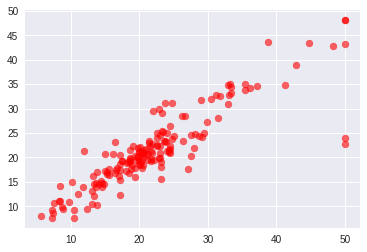

In [119]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_train, y_train)
rf_predict = rfr.predict(X_test)
print(f"MAE: {metrics.mean_absolute_error(y_test, rf_predict):.2f}")

grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 4)
grid_cv.fit(X_train, y_train) #сделать нормальное copy

#plt.scatter(y_test, grid_cv.best_estimator_.predict(X_test), color = "b", alpha = 0.6)
plt.scatter(y_test, rf_predict, color = "r", alpha = 0.6)
